In [1]:
import pandas as pd

train_df = pd.read_csv("./data/spaceship_titanic_train.csv", encoding="utf-8")
test_df = pd.read_csv("./data/spaceship_titanic_test.csv", encoding="utf-8")

### **데이터셋**
| **Column Name**       | **Description**                                                  |
|-----------------------|------------------------------------------------------------------|
| PassengerId           | 각 승객의 고유 ID                                               |
| gggg                  | 승객이 함께 여행하는 그룹                                      |
| pp                    | 그룹 내 승객 번호                                               |
| HomePlanet            | 출발지(행성)                                                   |
| CryoSleep             | 항해 중 애니메이션으로 전환되었는지 여부(취침 방식)          |
| Cabin                 | 승객이 머무는 객실 번호                                        |
|                       | deck = 객실 층                                                 |
|                       | num = 객실 번호                                                |
|                       | side = P(좌현), S(우현)                                       |
| Destination           | 도착지(행성)                                                   |
| Age                   | 승객 나이                                                       |
| VIP                   | VIP 서비스 제공에 대한 지불 여부                              |
| RoomService           | 고급 편의 시설 청구 금액                                      |
| FoodCourt             | 고급 편의 시설 청구 금액                                      |
| ShoppingMall          | 고급 편의 시설 청구 금액                                      |
| Spa                   | 고급 편의 시설 청구 금액                                      |
| VRDeck                | 고급 편의 시설 청구 금액                                      |
| Name                  | 승객의 이름(성, 이름)                                        |
| Transported           | 승객이 다른 차원으로 이동했는지 여부(도착 여부로 예측해야 할 값) |

## **데이터 기본적인 EDA**

In [2]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
df = pd.concat([train_df, test_df])

In [4]:
df = df.reset_index(drop=True)

In [5]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


In [7]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

## **데이터 전처리_1**

### **1. 데이터 파생**
#### **1-1. PassengerId에서 gggg로 따로 분리하기**

In [9]:
df["travel_group"] = df["PassengerId"].str.split("_").str[0]

#### **1-2. Cabin은 Cabin_deck(층), Cabin_num(호실), Cabin_side(좌/우현)으로 나누기**

In [10]:
df[["Cabin_deck", "Cabin_num", "Cabin_side"]] = df["Cabin"].str.split("/", expand=True)

In [11]:
df = df.drop("Cabin", axis=1)

### **2. 데이터 결측값 처리**

In [12]:
df["HomePlanet"].value_counts(normalize=True)

Earth     0.541318
Europa    0.247043
Mars      0.211639
Name: HomePlanet, dtype: float64

In [13]:
df["CryoSleep"].value_counts(normalize=True)

False    0.638152
True     0.361848
Name: CryoSleep, dtype: float64

In [14]:
df["Destination"].value_counts(normalize=True)

TRAPPIST-1e      0.698724
55 Cancri e      0.208018
PSO J318.5-22    0.093258
Name: Destination, dtype: float64

In [15]:
df["VIP"].value_counts(normalize=True)

False    0.97846
True     0.02154
Name: VIP, dtype: float64

In [16]:
df["Cabin_deck"].value_counts(normalize=True)

F    0.334543
G    0.298398
E    0.104412
B    0.090048
C    0.086970
D    0.056823
A    0.027938
T    0.000868
Name: Cabin_deck, dtype: float64

In [17]:
df["Cabin_num"].value_counts(normalize=True)

82      0.002683
4       0.002210
56      0.002210
95      0.002131
31      0.002131
          ...   
1848    0.000079
1847    0.000079
1846    0.000079
1844    0.000079
1890    0.000079
Name: Cabin_num, Length: 1894, dtype: float64

In [18]:
df["Cabin_side"].value_counts(normalize=True)

S    0.503591
P    0.496409
Name: Cabin_side, dtype: float64

#### **2-1. HomePlanet**
1. travel_group으로 groupby해서 최빈값으로 처리
2. 남은 결측값을 최빈값으로 처리

In [19]:
df["HomePlanet"] = df["HomePlanet"].fillna(
    df.groupby("travel_group")["HomePlanet"].transform(lambda x: x.mode()[0] 
    if not x.mode().empty else df["HomePlanet"].mode()[0])
)

#### **2-2. CryoSleep - 최빈값인 "False"로 처리**

In [20]:
df["CryoSleep"] = df["CryoSleep"].fillna(df["CryoSleep"].mode()[0])

#### **2-3. Cabin - deck, num, side는 최빈값으로 처리**

In [21]:
df["Cabin_deck"] = df["Cabin_deck"].fillna(df["Cabin_deck"].mode()[0])
df["Cabin_num"] = df["Cabin_num"].fillna("82")
df["Cabin_side"] = df["Cabin_side"].fillna(df["Cabin_side"].mode()[0])

#### **2-4. Destination - 최빈값인 "TRAPPIST-1e"로 처리**

In [22]:
df["Destination"] = df["Destination"].fillna("TRAPPIST-1e")

#### **2-5. Age - 중앙값으로 처리**

In [23]:
df["Age"] = df["Age"].fillna(df["Age"].median())

#### **2-6. VIP - 최빈값인 "False"로 처리**

In [24]:
df["VIP"] = df["VIP"].fillna("False")

#### **2-7. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - 중앙값으로 처리**

In [25]:
df["RoomService"] = df["RoomService"].fillna(df["RoomService"].median())
df["FoodCourt"] = df["FoodCourt"].fillna(df["FoodCourt"].median())
df["ShoppingMall"] = df["ShoppingMall"].fillna(df["ShoppingMall"].median())
df["Spa"] = df["Spa"].fillna(df["Spa"].median())
df["VRDeck"] = df["VRDeck"].fillna(df["VRDeck"].median())

### **3. 데이터 형변환**

#### **3-1. CryoSleep, VIP -> bool로 변경 -> int로 변경**

In [26]:
df[["CryoSleep", "VIP"]] = df[["CryoSleep", "VIP"]].astype("bool")

In [27]:
df[["CryoSleep", "VIP"]] = df[["CryoSleep", "VIP"]].astype(int)

#### **3-2. Transported -> bool로 변경**

In [28]:
df["Transported"] = df["Transported"].astype("bool")

#### **3-3. Cabin_num -> int로 변경**

In [29]:
df["Cabin_num"] = df["Cabin_num"].astype(int)

## **데이터 EDA**

C:\Users\ysh10\AppData\Local\Temp\ipykernel_39764\1050232671.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


<AxesSubplot: >

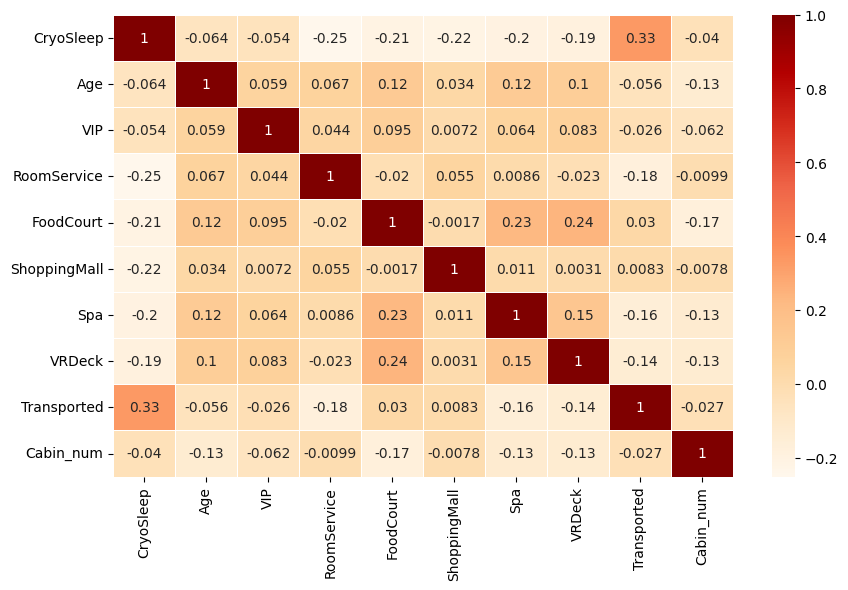

In [30]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(
    df.corr(),
    annot=True,
    linewidth=0.5,
    cmap="OrRd"
)

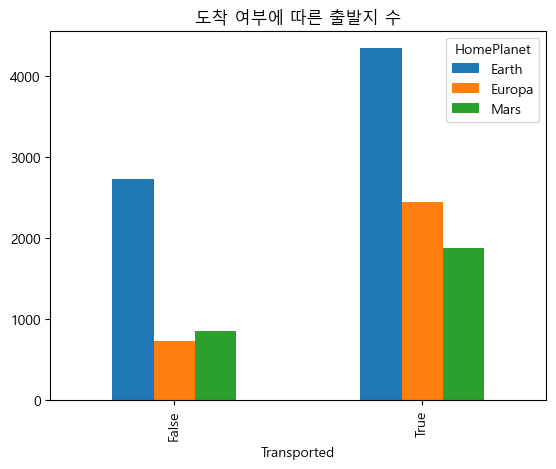

In [31]:
from matplotlib import font_manager, rc
plt.rc("font", family = "Malgun Gothic") 

count_data = df.groupby(["Transported", "HomePlanet"]).size().unstack(fill_value=0)

count_data.plot(kind="bar")
plt.title("도착 여부에 따른 출발지 수")
plt.xlabel("Transported")
plt.xticks(rotation=90)
plt.legend(title="HomePlanet")
plt.show()

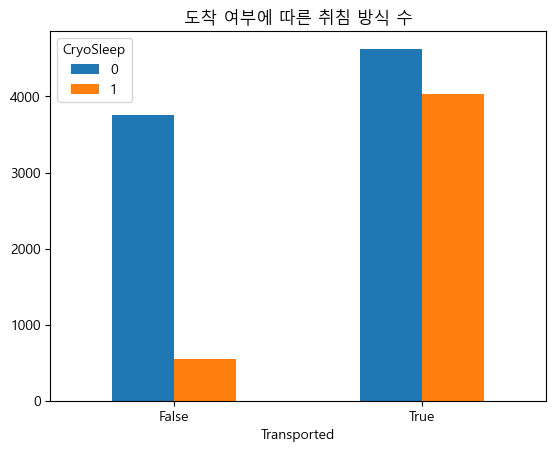

In [32]:
count_data = df.groupby(["Transported", "CryoSleep"]).size().unstack(fill_value=0)

count_data.plot(kind="bar")
plt.title("도착 여부에 따른 취침 방식 수")
plt.xlabel('Transported')
plt.xticks(rotation=0)
plt.legend(title='CryoSleep')
plt.show()

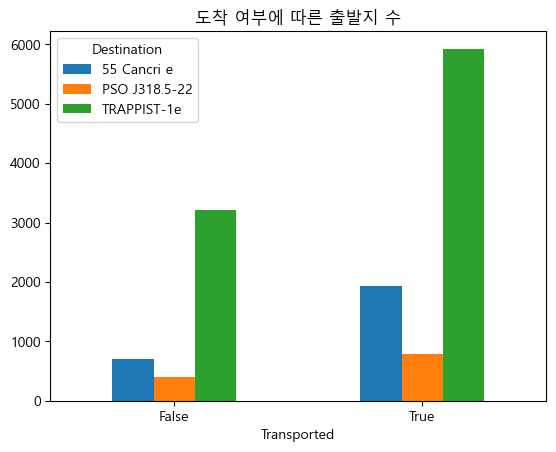

In [33]:
count_data = df.groupby(['Transported', 'Destination']).size().unstack(fill_value=0)

# 그래프 그리기
count_data.plot(kind='bar')
plt.title("도착 여부에 따른 출발지 수")
plt.xlabel('Transported')
plt.xticks(rotation=0)
plt.legend(title='Destination')
plt.show()

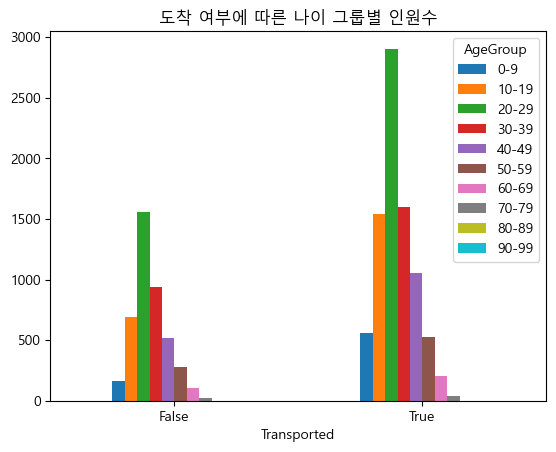

In [34]:
# Age를 범위별로 그룹화하기
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df["AgeGroup"] = pd.cut(df['Age'], bins=bins, labels=labels)

count_data = df.groupby(['Transported', 'AgeGroup']).size().unstack(fill_value=0)

# 그래프 그리기
count_data.plot(kind='bar')
plt.title("도착 여부에 따른 나이 그룹별 인원수")
plt.xlabel('Transported')
plt.xticks(rotation=0)
plt.legend(title='AgeGroup')
plt.show()

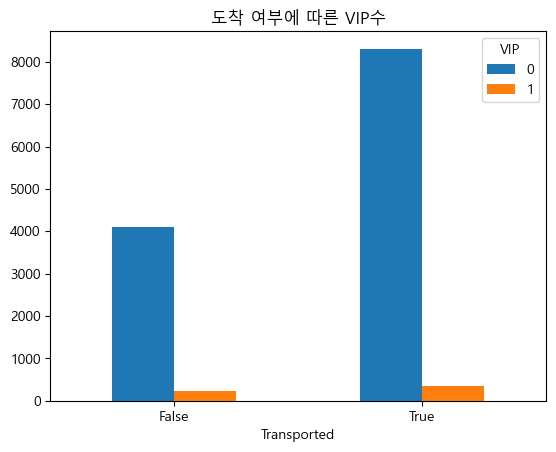

In [35]:
count_data = df.groupby(['Transported', 'VIP']).size().unstack(fill_value=0)

# 그래프 그리기
count_data.plot(kind='bar')
plt.title("도착 여부에 따른 VIP수")
plt.xlabel('Transported')
plt.xticks(rotation=0)
plt.legend(title='VIP')
plt.show()

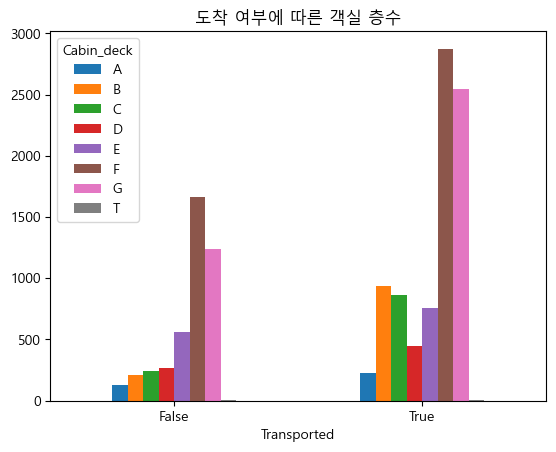

In [36]:
count_data = df.groupby(['Transported', 'Cabin_deck']).size().unstack(fill_value=0)

# 그래프 그리기
count_data.plot(kind='bar')
plt.title("도착 여부에 따른 객실 층수")
plt.xlabel('Transported')
plt.xticks(rotation=0)
plt.legend(title='Cabin_deck')
plt.show()

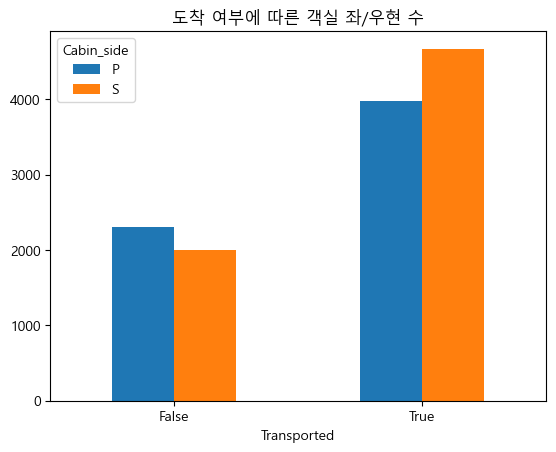

In [37]:
count_data = df.groupby(['Transported', 'Cabin_side']).size().unstack(fill_value=0)

# 그래프 그리기
count_data.plot(kind='bar')
plt.title("도착 여부에 따른 객실 좌/우현 수")
plt.xlabel('Transported')
plt.xticks(rotation=0)
plt.legend(title='Cabin_side')
plt.show()

## **데이터 전처리_2**

In [38]:
df = df.drop(["Name", "travel_group"], axis=1)

* Label Encoding: CryoSleep, VIP
* One-Hot Encoding: HomePlanet, Destination, Cabin_deck, Cabin_side

In [39]:
label_encoder = LabelEncoder()
df["CryoSleep"] = label_encoder.fit_transform(df["CryoSleep"])
df["VIP"] = label_encoder.fit_transform(df["VIP"])

In [40]:
HomePlanet_dummies = pd.get_dummies(df["HomePlanet"], prefix="HomePlanet")
Destination_dummies = pd.get_dummies(df["Destination"], prefix="Destination")
Cabin_deck_dummies = pd.get_dummies(df["Cabin_deck"], prefix="Deck")
Cabin_side_dummies = pd.get_dummies(df["Cabin_side"], prefix="Side")

In [41]:
df = pd.concat([df, HomePlanet_dummies, Destination_dummies, Cabin_deck_dummies, Cabin_side_dummies], axis=1)

In [42]:
df = df.drop(["HomePlanet", "Destination", "Cabin_deck", "Cabin_side"], axis=1)

In [43]:
df = df.drop(["AgeGroup"], axis=1)

* 편의시설에 표함되어 있는 지표들이 왼쪽으로 쏠려 있어서 log를 씌워주기

array([[<AxesSubplot: title={'center': 'RoomService'}>,
        <AxesSubplot: title={'center': 'FoodCourt'}>,
        <AxesSubplot: title={'center': 'ShoppingMall'}>],
       [<AxesSubplot: title={'center': 'Spa'}>,
        <AxesSubplot: title={'center': 'VRDeck'}>, <AxesSubplot: >]],
      dtype=object)

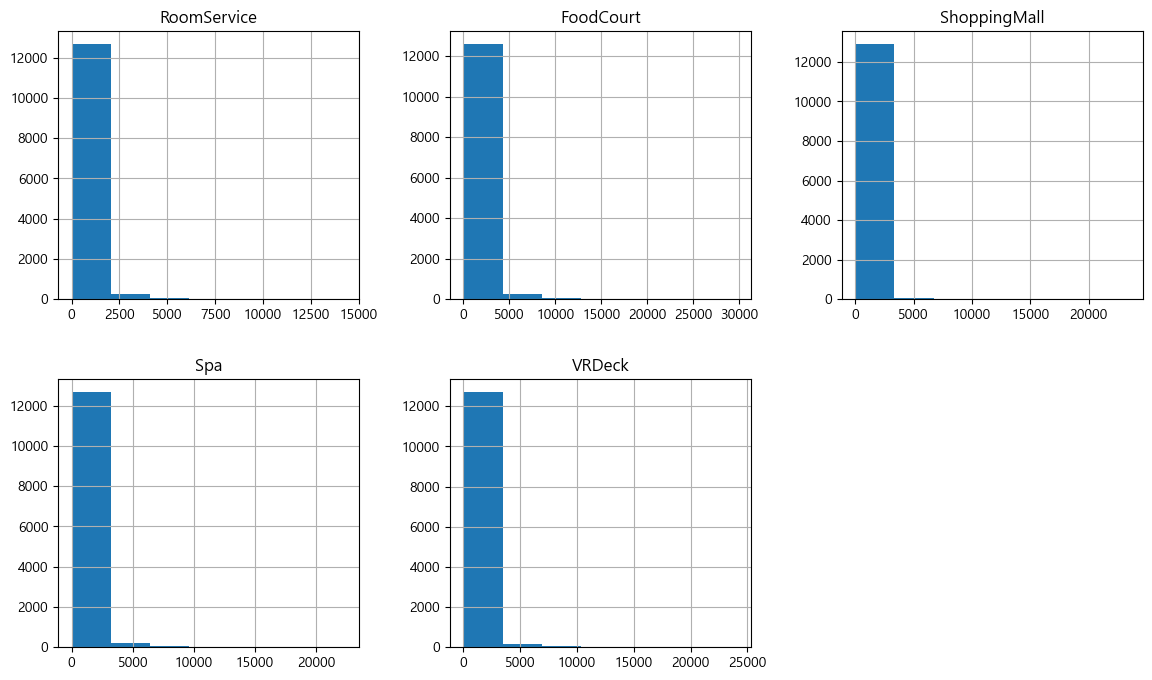

In [44]:
df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Cabin_num"]].hist(bins=7, figsize=(14, 8), layout=(2, 3))

In [45]:
df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = np.log1p(df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]])

* Cabin_num이 왼쪽으로 쏠려 있어서 log를 씌워주기

<AxesSubplot: >

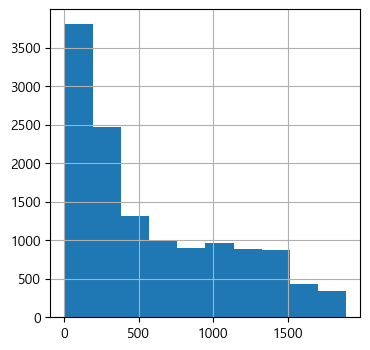

In [46]:
df["Cabin_num"].hist(bins=10, figsize=(4, 4))

In [47]:
df["Cabin_num"] = np.log1p(df["Cabin_num"])

* Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - StanderdScaler
* Cabin_num - MinMaxScaler 

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [49]:
df[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = standard_scaler.fit_transform(df[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]])

In [50]:
df["Cabin_num"] = minmax_scaler.fit_transform(df[["Cabin_num"]])

C:\Users\ysh10\AppData\Local\Temp\ipykernel_39764\753127217.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


<AxesSubplot: >

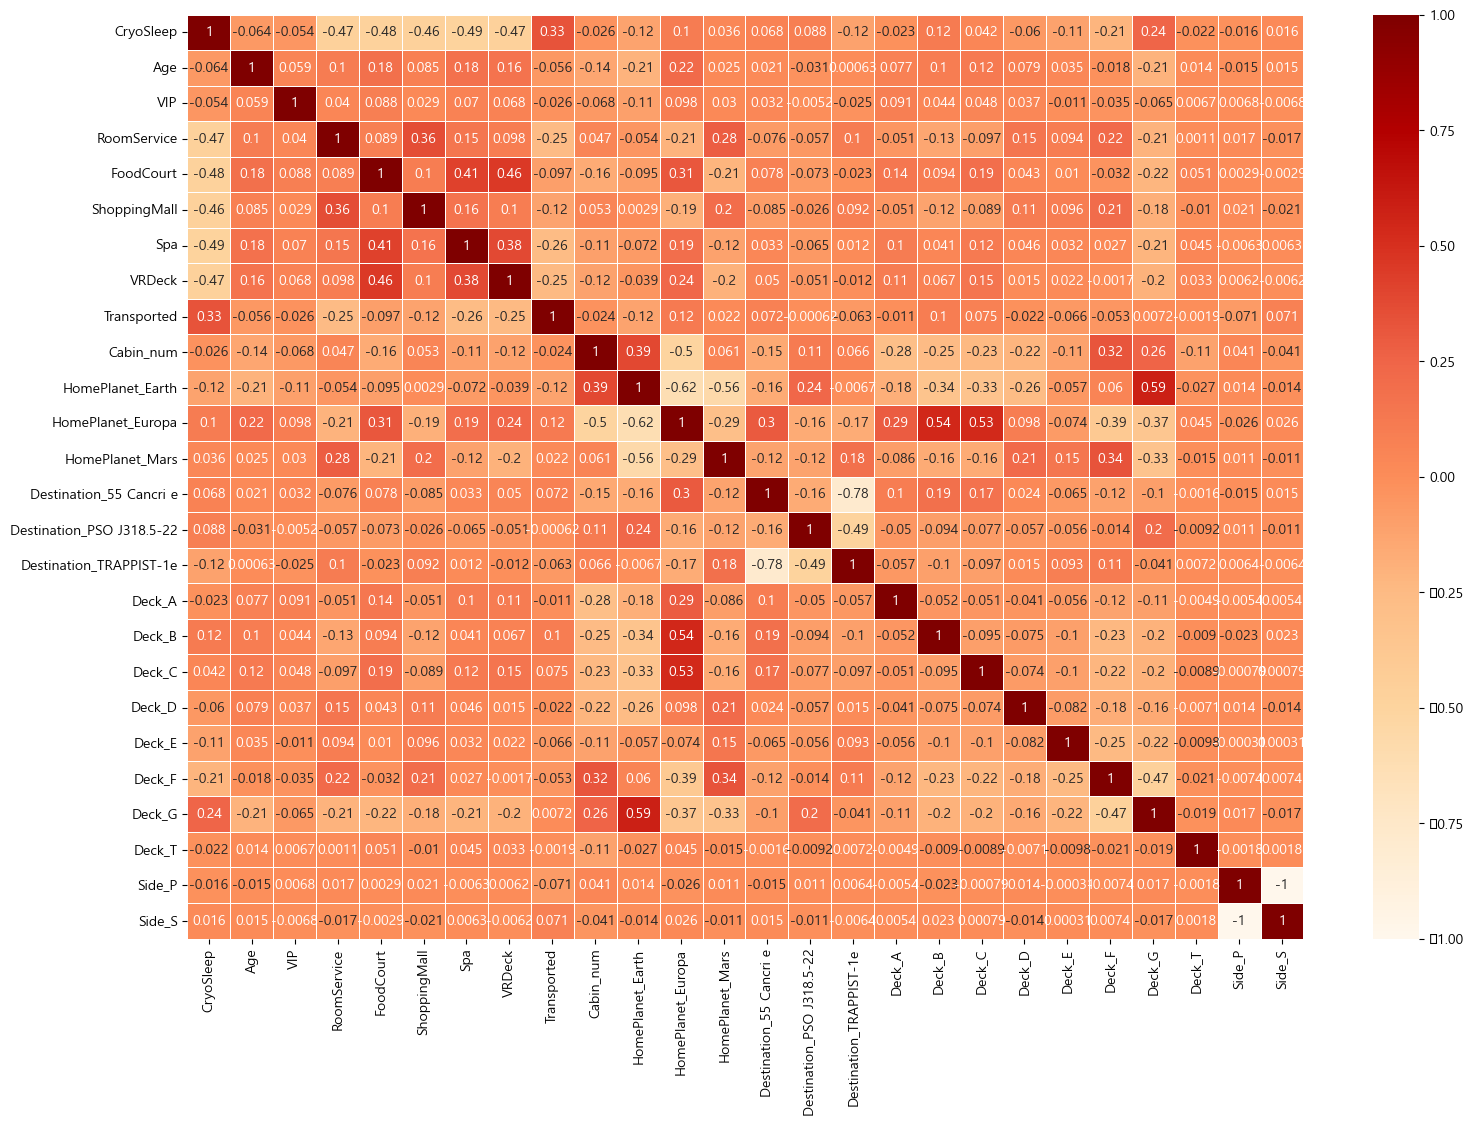

In [58]:
plt.figure(figsize=(18, 12))
sns.heatmap(
    df.corr(),
    annot=True,
    linewidth=0.5,
    cmap="OrRd"
)

## **데이터셋 분리&저장**

In [51]:
train_df = df.iloc[:8693]
test_df = df.iloc[8693:]

In [52]:
train_df.to_csv("./data/preprocessed_train.csv", index=False, encoding="utf-8")

In [53]:
test_df = test_df.drop(["Transported"], axis=1)

In [54]:
test_df.to_csv("./data/preprocessed_test.csv", index=False, encoding="utf-8")